In [1]:
import h5py as hp
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import illustris_python as il
import matplotlib.gridspec as gspec
import matplotlib as mpl
import copy
from hc_lib.plots.fig_lib import FigureLibrary
tngpath = '/lustre/cosinga/L75n1820TNG/'
basepath = '/lustre/cosinga/hcolor/fig_md_analysis/'

In [2]:
cf = hp.File(basepath+'HIXgalaxy/colorR_fieldnameC_2D.hdf5', 'r')
head = il.groupcat.loadHeader(tngpath+'output/', 99)


In [3]:
print(cf.keys())
print(dict(cf['0 0 0 x'].attrs))
print(cf['0 0 0 x'].shape)

<KeysViewHDF5 ['0 0 0 x', '0 0 0 y', '0 0 0 z', '0 0 1 x', '0 0 1 y', '0 0 1 z', '0 0 2 x', '0 0 2 y', '0 0 2 z', '0 0 3 x', '0 0 3 y', '0 0 3 z', '0 1 0 x', '0 1 0 y', '0 1 0 z', '0 1 1 x', '0 1 1 y', '0 1 1 z', '0 1 2 x', '0 1 2 y', '0 1 2 z', '0 1 3 x', '0 1 3 y', '0 1 3 z', '0 1 4 x', '0 1 4 y', '0 1 4 z', '0 1 5 x', '0 1 5 y', '0 1 5 z', '0 1 6 x', '0 1 6 y', '0 1 6 z', '0 1 7 x', '0 1 7 y', '0 1 7 z', '0 1 8 x', '0 1 8 y', '0 1 8 z', '0 2 0 x', '0 2 0 y', '0 2 0 z', '1 0 0 x', '1 0 0 y', '1 0 0 z', '1 0 1 x', '1 0 1 y', '1 0 1 z', '1 0 2 x', '1 0 2 y', '1 0 2 z', '1 0 3 x', '1 0 3 y', '1 0 3 z', '1 1 0 x', '1 1 0 y', '1 1 0 z', '1 1 1 x', '1 1 1 y', '1 1 1 z', '1 1 2 x', '1 1 2 y', '1 1 2 z', '1 1 3 x', '1 1 3 y', '1 1 3 z', '1 1 4 x', '1 1 4 y', '1 1 4 z', '1 1 5 x', '1 1 5 y', '1 1 5 z', '1 1 6 x', '1 1 6 y', '1 1 6 z', '1 1 7 x', '1 1 7 y', '1 1 7 z', '1 1 8 x', '1 1 8 y', '1 1 8 z', '1 2 0 x', '1 2 0 y', '1 2 0 z', '2 0 0 x', '2 0 0 y', '2 0 0 z', '2 0 1 x', '2 0 1 y', '2 0 1

In [4]:
def get_match(props):
    keys = cf.keys()
    matches = []
    for k in keys:
        is_match = True
        if 'x' in k:
            for p,v in props.items():
                try:
                    lval = cf[k].attrs[p]
                    
                    is_match = (is_match and v in lval)
                except KeyError:
                    continue
            if is_match:
                matches.append(k)
    return matches

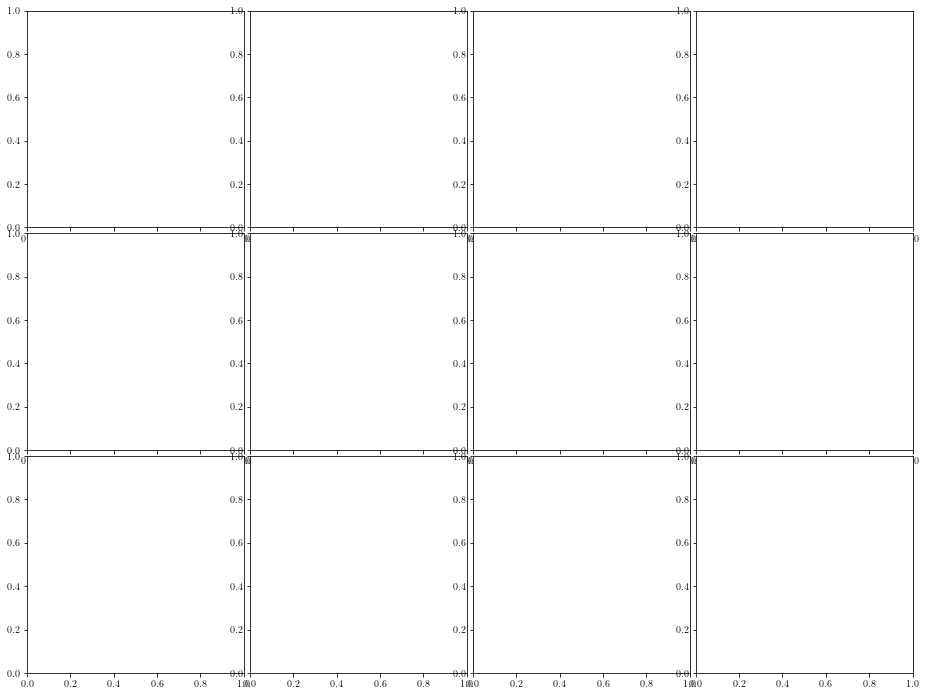

In [5]:
# figure with all HI distributions
nrows = 3
ncols = 4
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.has_cbar_col = True
flib.xborder = xborder
flib.yborder = yborder
flib.figsize = [figwidth, figheight]

In [6]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)


fieldnames = ['hiptl', 'hisubhalo', 'vn']
colors = ['blue', 'red', 'resolved']
for i in range(nrows):
    for j in range(ncols - 1):
        props = {'fieldname':fieldnames[j], 'color':colors[i]}
        keys_for_panels[i,j] = get_match(props)[0]
        
        
        

In [7]:
flib.assign2DNorms()
flib.assignColormaps(cmap_name = 'viridis')

/lustre/cosinga/hcolor/hc_lib/plots/fig_lib.py:435: RuntimeWarning: invalid value encountered in log10
  plotpk = np.log10(pk[:paridx, :peridx])


(0, 0)
['hiptl' 'galaxy']
(0, 1)
['hisubhalo' 'galaxy']
(0, 2)
['vn' 'galaxy']
(1, 0)
['hiptl' 'galaxy']
(1, 1)
['hisubhalo' 'galaxy']
(1, 2)
['vn' 'galaxy']
(2, 0)
['hiptl' 'galaxy']
(2, 1)
['hisubhalo' 'galaxy']
(2, 2)
['vn' 'galaxy']


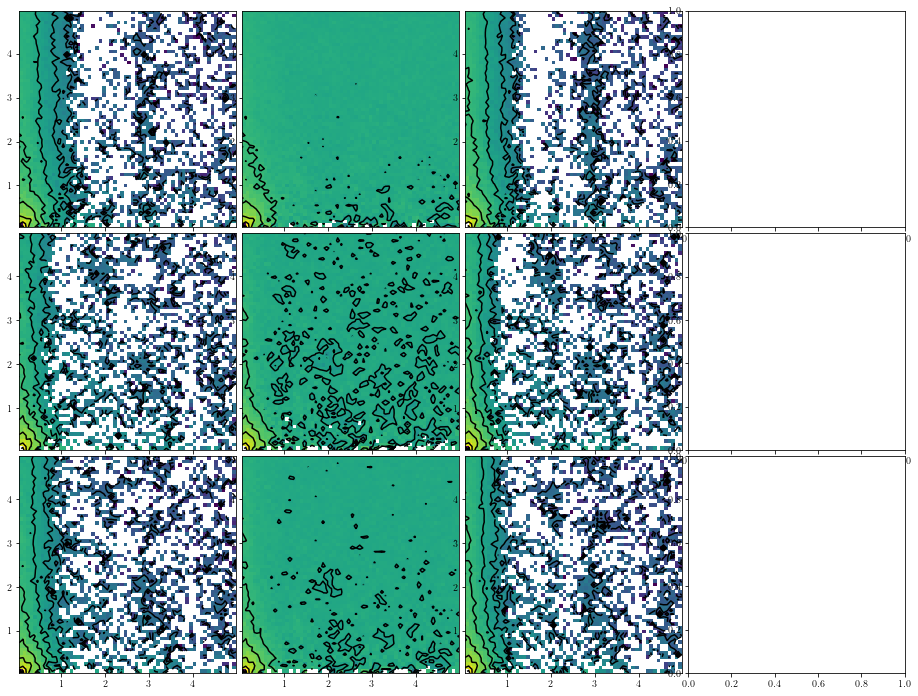

In [8]:

for i in range(nrows):
    for j in range(ncols - 1):
        idx = (i, j)
        key = keys_for_panels[idx]

        # there should be just one key
        kpar = cf[key]
        kper = cf[key[:-1] + 'y']
        pk = cf[key[:-1] + 'z']
        
        flib.plot2DPanel(idx, kpar, kper, pk)
        print(idx)
        print(cf[key].attrs['fieldname'])
fig

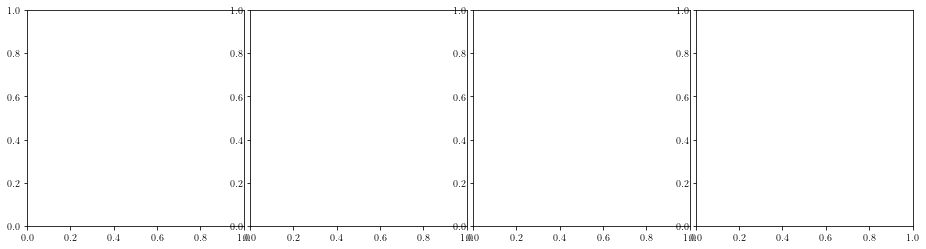

In [39]:
# figure with just hisubhalo
nrows = 1
ncols = 4
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.has_cbar_col = True
flib.xborder = xborder
flib.yborder = yborder
flib.figsize = [figwidth, figheight]

In [40]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)


# fieldnames = ['hiptl', 'hisubhalo', 'vn']
fieldnames = ['hisubhalo']
colors = ['blue', 'red', 'resolved']
for i in range(nrows):
    for j in range(ncols - 1):
        props = {'fieldname':fieldnames[i], 'color':colors[j]}
        keys_for_panels[i,j] = get_match(props)[0]
        
        
        

In [41]:
flib.assign2DNorms()
flib.assignColormaps(cmap_name = 'viridis')

/lustre/cosinga/hcolor/hc_lib/plots/fig_lib.py:435: RuntimeWarning: invalid value encountered in log10
  plotpk = np.log10(pk[:paridx, :peridx])


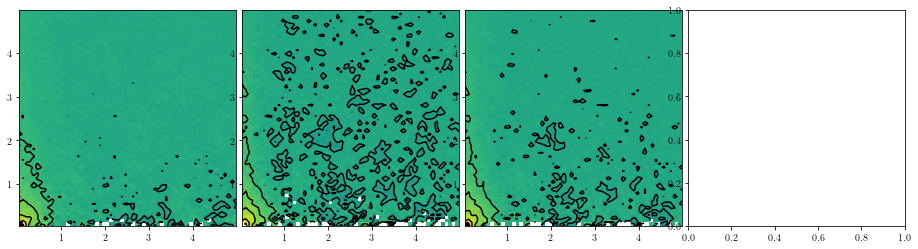

In [42]:

for i in range(nrows):
    for j in range(ncols - 1):
        idx = (i, j)
        key = keys_for_panels[idx]

        # there should be just one key
        kpar = cf[key]
        kper = cf[key[:-1] + 'y']
        pk = cf[key[:-1] + 'z']
        
        flib.plot2DPanel(idx, kpar, kper, pk)
fig

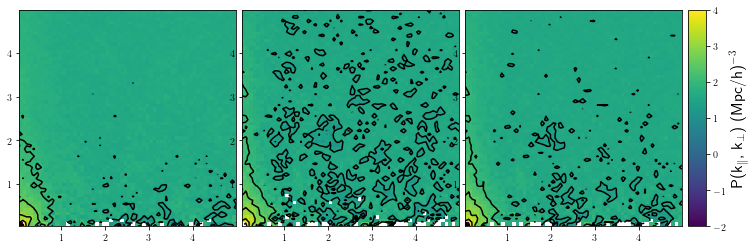

In [43]:
norm = flib.norm_arr[0,0]
cmap = flib.cmap_arr[0,0]
sm = mpl.cm.ScalarMappable(norm = norm, cmap = cmap)
cax = panels[0][3]
cax.set_aspect(12, anchor='W')
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label(r'P(k$_\parallel$, k$_\perp$) (Mpc/h)$^{-3}$', fontsize=16)
fig

In [44]:
# labels
flib.defaultAxesLabels(2)
flib.addColLabels(['Blue-HI Galaxies', 'Red-HI Galaxies', 'All-HI Galaxies',''], in_panel='True', color='white',
                 pos=(0.95, 0.95), va = 'top', ha = 'right')

# ticks
dexc = flib._defaultTickLabelPanelExceptions('y')
flib.removeYTickLabels(panel_exceptions = dexc + [(0,3)])
flib.removeXTickLabels()
flib.changeTickDirection(panel_exceptions=dexc)


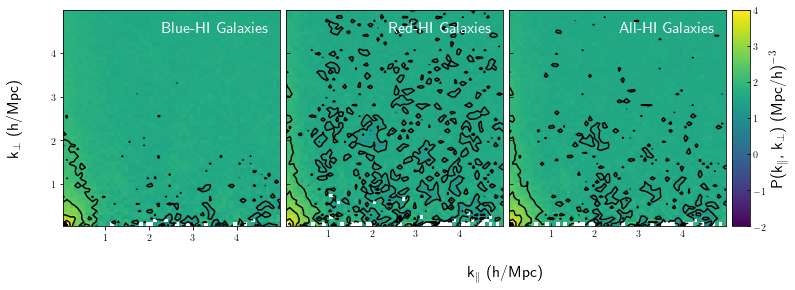

In [45]:
fig

In [46]:
fig.savefig('hisubhaloXgalaxy_2D.pdf')

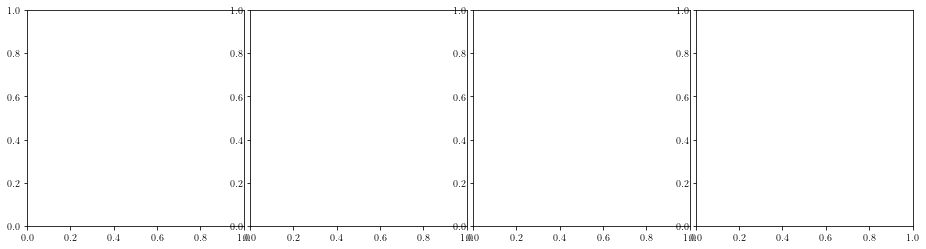

In [47]:
# figure with just hisubhalo
nrows = 1
ncols = 4
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3


# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols)
plt.subplots_adjust(left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.has_cbar_col = True
flib.xborder = xborder
flib.yborder = yborder
flib.figsize = [figwidth, figheight]

In [ ]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)


# fieldnames = ['hiptl', 'hisubhalo', 'vn']
fieldnames = ['hisubhalo']
colors = ['blue', 'red', 'resolved']
for i in range(nrows):
    for j in range(ncols - 1):
        props = {'fieldname':fieldnames[i], 'color':colors[j]}
        keys_for_panels[i,j] = get_match(props)[0]
        
        
cmap_arr = np.empty((nrows,ncols), dtype=object)
cmap_arr[0,0] = copy.copy(mpl.cm.get_cmap('Blues'))
cmap_arr[0,1] = copy.copy(mpl.cm.get_cmap('Reds'))
cmap_arr[0,2] = copy.copy(mpl.cm.get_cmap('Purples'))

norm_arr = np.empty((nrows,ncols), dtype=object)
for j in range(ncols):